In [88]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import PorterStemmer
#from nltk.stem.porter import stemmer
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Angelos
[nltk_data]     Pele\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.interfaces import TransformationABC
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
# pd.set_option("display.max_colwidth", 200)

In [90]:
df = {}
df['month'] = []
df['article'] = []
df['year'] = []
with open('elonmusk.csv', 'r', encoding='utf-8') as file:
    for line in file:
        line_split = line.split('\t')
        date = line_split[1]
        text = line_split[2]
        df['month'].append(int(date[5:7]))
        df['year'].append(int(date[1:5]))
        df['article'].append(str(text))

In [91]:
news_df = pd.DataFrame(df)

In [92]:
news_df.head(10)

,month,article,year
0,4,"""SpaceX gets Cape Canaveral launch pad""",2007
1,4,"""UPDATE 3-SpaceX gets Cape Canaveral launch pad""",2007
2,4,"""CORRECTED: U.S. lets SpaceX operate at Cape Canaveral""",2007
3,4,"""CORRECTED - UPDATE 2-US lets SpaceX operate at Cape Canaveral""",2007
4,4,"""U.S. lets SpaceX operate at Cape Canaveral""",2007
5,4,"""SpaceX gets Cape Canaveral launch pad""",2007
6,5,"""Electric car firm Tesla secures $45 mln funding""",2007
7,8,"""Tesla all-electric Roadster to hit road by year end""",2007
8,11,"""Tesla names CEO ahead of electric Roadster launch""",2007
9,11,""" Tesla Completes CEO Search""",2007


In [93]:
number_of_topics = 3

In [94]:
#news_df = pd.DataFrame({'document':documents})

# removing everything except alphabets`
news_df['article'] = news_df['article'].str.replace("[^a-zA-Z#]", " ")


# removing short words
news_df['article'] = news_df['article'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase
news_df['article'] = news_df['article'].apply(lambda x: x.lower())
news_df["index"] = news_df.index
documents = news_df

In [95]:
def lemmatize_stemming(text):
    return PorterStemmer().stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [96]:
processed_docs = news_df['article'].map(preprocess)
processed_docs[:10]

0                  [spacex, get, cape, canaver, launch]
1           [updat, spacex, get, cape, canaver, launch]
2           [correct, let, spacex, oper, cape, canaver]
3    [correct, updat, let, spacex, oper, cape, canaver]
4                    [let, spacex, oper, cape, canaver]
5                  [spacex, get, cape, canaver, launch]
6                    [electr, firm, tesla, secur, fund]
7                 [tesla, electr, roadster, road, year]
8        [tesla, name, ahead, electr, roadster, launch]
9                              [tesla, complet, search]
Name: article, dtype: object

In [97]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 canaver
1 cape
2 get
3 launch
4 spacex
5 updat
6 correct
7 let
8 oper
9 electr
10 firm


In [98]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=10000)

In [99]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[2000]

[(3, 1), (32, 1), (108, 1), (115, 1)]

In [100]:
bow_doc_4310 = bow_corpus[2000]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 3 ("updat") appears 1 time.
Word 32 ("say") appears 1 time.
Word 108 ("batteri") appears 1 time.
Word 115 ("talk") appears 1 time.


In [101]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.878760990279236), (1, 0.4066356810504668), (2, 0.249853046529514)]


In [102]:
import pyLDAvis

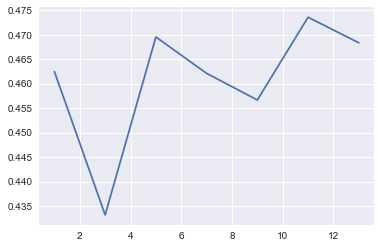

In [87]:
x = []
y = []
for i in range(1, 15, 2):
    lda_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=i, id2word=dictionary, passes=2, workers=2)
    cm = CoherenceModel(model=lda_model, texts=processed_docs, coherence='c_v')
    coherence = cm.get_coherence()  # get coherence value
    x.append(i)
    y.append(coherence)
plt
plt.plot(x, y)

In [103]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=6, id2word=dictionary, passes=2, workers=2, alpha='asymmetric')

In [73]:
cm = CoherenceModel(model=lda_model, corpus=bow_corpus, coherence='u_mass')
coherence = cm.get_coherence()  # get coherence value

In [74]:
coherence

-10.221916578886896

In [75]:
import pyLDAvis.gensim
hello = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
pyLDAvis.display(hello)

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [104]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.079*"spacex" + 0.035*"updat" + 0.029*"launch" + 0.028*"space" + 0.026*"motor" + 0.025*"station" + 0.023*"model" + 0.020*"nasa" + 0.015*"batteri" + 0.015*"rocket"
Topic: 1 
Words: 0.071*"spacex" + 0.053*"rocket" + 0.039*"say" + 0.035*"model" + 0.032*"launch" + 0.022*"falcon" + 0.018*"roadster" + 0.018*"test" + 0.017*"offer" + 0.016*"land"
Topic: 2 
Words: 0.098*"motor" + 0.058*"musk" + 0.045*"elon" + 0.037*"updat" + 0.026*"market" + 0.023*"ford" + 0.022*"spacex" + 0.020*"toyota" + 0.020*"auto" + 0.016*"see"
Topic: 3 
Words: 0.098*"quarter" + 0.096*"result" + 0.061*"announc" + 0.058*"motor" + 0.056*"financi" + 0.042*"report" + 0.039*"releas" + 0.036*"second" + 0.030*"date" + 0.023*"fourth"
Topic: 4 
Words: 0.224*"motor" + 0.067*"highlight" + 0.067*"zack" + 0.059*"analyst" + 0.053*"blog" + 0.041*"toyota" + 0.035*"ford" + 0.034*"gener" + 0.031*"sale" + 0.023*"honda"
Topic: 5 
Words: 0.135*"electr" + 0.126*"model" + 0.064*"updat" + 0.050*"car" + 0.040*"carmak" + 0.033*"mo

In [77]:
#number of documents
lda_model[bow_corpus[354]]
processed_docs.shape

(2902,)

In [78]:
news_df

,month,article,year,index
0,4,spacex gets cape canaveral launch,2007,0
1,4,update spacex gets cape canaveral launch,2007,1
2,4,corrected lets spacex operate cape canaveral,2007,2
3,4,corrected update lets spacex operate cape canaveral,2007,3
4,4,lets spacex operate cape canaveral,2007,4
5,4,spacex gets cape canaveral launch,2007,5
6,5,electric firm tesla secures funding,2007,6
7,8,tesla electric roadster road year,2007,7
8,11,tesla names ahead electric roadster launch,2007,8
9,11,tesla completes search,2007,9


In [79]:
result = pd.concat([news_df, processed_docs], axis=1)

In [80]:
result['time'] = result['year'] + (result['month']//2)/6.0

In [81]:
n = processed_docs.shape[0]
pred = []
for j in range(number_of_topics):
    pred.append([])
for i in range(n):
    for j in range(number_of_topics):
        if len(lda_model[bow_corpus[i]]) <= j:
            pred[j].append(0.0)
        else:
            pred[j].append(lda_model[bow_corpus[i]][j][1])
for j in range(number_of_topics):
    pred[j] = pd.Series(pred[j])

In [82]:
result = pd.concat([result]+pred, axis=1)

In [83]:
results = result.groupby(['time']).mean()

In [84]:
results

,month,year,index,0,1,2
time,,,,,,
2007.333333,4.142857,2007.000000,3.0,0.369572,0.357505,0.079906
2007.666667,8.000000,2007.000000,7.0,0.033348,0.033633,0.033459
2007.833333,11.000000,2007.000000,8.5,0.307990,0.288605,0.058468
2008.000000,4.142857,2007.714286,13.0,0.170782,0.285277,0.121065
2008.166667,2.500000,2008.000000,21.5,0.207511,0.284245,0.077301
2008.333333,4.250000,2008.000000,28.5,0.040885,0.040855,0.228103
2008.500000,6.400000,2008.000000,35.5,0.118049,0.212245,0.377406
2008.666667,8.500000,2008.000000,47.5,0.152553,0.245033,0.183302
2008.833333,10.523810,2008.000000,65.0,0.100112,0.244246,0.337861


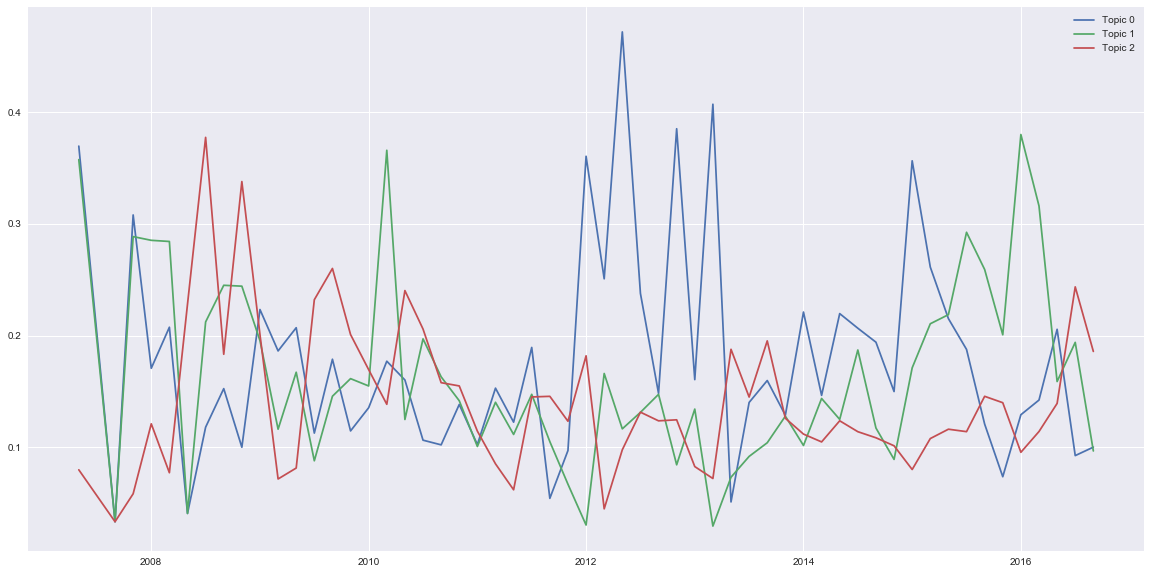

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(results[[0, 1, 2]])
plt.legend(["Topic "+str(i) for i in range(number_of_topics)])

In [86]:
sns.set()

In [26]:
processed_docs

0                       [meltingic, assum, acceler, comfort, direct, feel, like, mild, moder, http, fpjmegrhfc]
1             [spacex, capabl, transport, satellit, orbit, crew, cargo, space, station, complet, mission, moon]
2                                                                                                      [bigajm]
3                                                                                                  [http, muhm]
4                                                             [place, earth, min, cost, seat, http, dgyddgttyd]
5       [spacex, support, creation, perman, self, sustain, human, presenc, mar, http, kctblpbsg, http, hksrocg]
6                                                                                            [earth, min, http]
7                                          [mar, citi, opposit, earth, dawn, dusk, blue, mar, http, xhczidgqnb]
8                                                                                     [moon, base, alpha

In [27]:
lda_model

In [28]:
bow_corpus

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [],
 [(2, 1)],
 [(2, 1), (13, 1), (14, 1), (15, 1), (16, 1)],
 [(2, 2), (11, 1), (17, 1), (18, 1), (19, 1), (20, 1)],
 [(2, 1), (14, 1), (15, 1)],
 [(2, 1), (14, 1), (18, 2)],
 [(2, 1), (7, 1)],
 [(2, 1), (21, 1), (22, 1), (23, 1)],
 [(2, 1),
  (8, 1),
  (11, 1),
  (14, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1)],
 [],
 [(28, 1)],
 [(2, 1)],
 [(13, 1), (29, 1), (30, 1), (31, 1)],
 [(1, 1), (32, 2), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1)],
 [],
 [(2, 1), (27, 1), (38, 1), (39, 1)],
 [],
 [(2, 1), (11, 1), (26, 1), (32, 1), (40, 1), (41, 1)],
 [(39, 1)],
 [(42, 1), (43, 1)],
 [(2, 1), (11, 1), (26, 1), (32, 1), (40, 1)],
 [(3, 1), (44, 1)],
 [(2, 1), (45, 1), (46, 1)],
 [(39, 1), (47, 1), (48, 1), (49, 1), (50, 1)],
 [(29, 1), (51, 1)],
 [],
 [(2, 1), (52, 1), (53, 1), (54, 1), (55, 1)],
 [(2, 1), (56, 1), (57, 1)],
 [(54, 1), (58, 1)],
 [(59, 1)],
 [(2, 1

In [40]:
#Now let's average out those scores over the surrounding 1000 articles scores to see how average scores change over time
n = processed_docs.shape[0]
averages = []
i=0
start = 2012
end = 2017
dates = []
while(i<n):
    array = np.zeros((10,1))
    k=0
    pred = lda_model[bow_corpus[i]]
    for j in range(10):
        if j in [tup[0] for tup in pred]:
            array[j,:] = pred[k][1]
            k+=1
            
    running_sum = array
    print(array)
    break
    i+=1
    count = 0
    while (i)%500 != 0 and i<n:
        #print(i)
        array = np.zeros((10,1))
        k=0
        pred = lda_model[bow_corpus[i]]
        for j in range(10):
            if j in [tup[0] for tup in pred]:
                try:
                    array[j,:] = pred[k][1]
                    k+=1
                except:
                    print(i,array,j,k,pred)

        running_sum = running_sum + array
        i+=1
        count+=1
    averages.append(running_sum/count)
    dates.append(start + (end-start)*i/n)

[[0.02000602]
 [0.020004  ]
 [0.02000205]
 [0.02000689]
 [0.02000181]
 [0.81996679]
 [0.02000128]
 [0.0200017 ]
 [0.02000455]
 [0.02000487]]


In [23]:
averages = np.hstack(average for average in averages)
averages.shape

(10, 7)

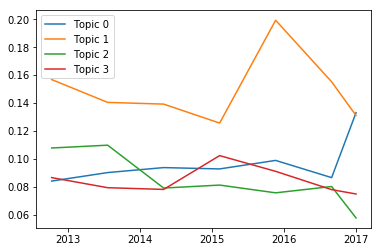

In [24]:
import matplotlib.pyplot as plt
plt.plot(dates,averages[:4,:].T)
plt.legend(["Topic "+str(i) for i in range(averages.shape[0])])